**LAB 03: Exploration Data Analysis & Feature Engineering**

---

🎯 **Mục tiêu bài lab:**
- Thực hành Clean Data

- Thực hành EDA

  - Phân phối dữ liệu
  - Tương quan dữ liệu

- Thực hành Feature Engineering
  - Biến đổi feature
  - Tạo mới feature

📖 **Hướng dẫn:**

Học viên đọc hiểu bài lab, thực hiện các block code với tag #TODO , có thể tham khảo solution tại [notebook solution](https://github.com/VietinBank/training-resources/tree/main/solution)


In [120]:
#@title Import thư viện

# Pandas tương tác dữ liệu
import pandas as pd
# Thư viện seaborn cho data visualization
import seaborn as sns

## Đọc dữ liệu với pandas

In [121]:
data_url = 'https://raw.githubusercontent.com/VietinBank/training-resources/main/labs/data/taxi-trips.csv'
data = pd.read_csv(data_url)

In [122]:
columns = ['vendor_id','pickup_datetime','dropoff_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','rate_code','passenger_count','tolls_amount','fare_amount']
data = data[columns]
data.head(5)

,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,rate_code,passenger_count,tolls_amount,fare_amount
0,VTS,2015-06-09T20:43:54Z,2015-06-09T20:44:18Z,-73.989525,40.735950,-73.988747,40.736984,1,6,0.0,2.5
1,VTS,2015-06-12T00:24:40Z,2015-06-12T01:05:38Z,-73.987953,40.743717,-73.945580,40.829327,1,1,0.0,2.5
2,CMT,2015-06-04T01:00:45Z,2015-06-04T01:01:14Z,-73.977577,40.757839,-73.978226,40.758121,1,1,0.0,2.5
3,CMT,2015-01-02T18:58:25Z,2015-01-02T18:58:39Z,-73.992142,40.739388,-73.992096,40.739491,1,1,0.0,2.5
4,VTS,2015-02-05T17:12:34Z,2015-02-05T17:13:02Z,-74.004471,40.721657,-74.004333,40.721790,1,5,0.0,2.5


**Ý nghĩa tập dữ liệu**

Tập dữ liệu bao về các chuyến taxi newyork. Dữ liệu free [tại đây](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

> vendor_id

Các hãng taxi
> pickup_datetime	/ dropoff_datetime

Thời gian đón/ trả khách
> pickup_longitude / pickup_latitude

Tọa độ đón khách
> dropoff_longitude	/ dropoff_latitude

Tọa độ trả khách
> rate_code

Đánh giá (sao)
> passenger_count	

Số khách / chuyến
> tolls_amount

Phí đường bộ

> fare_amount

Phí vận chuyển (label)





In [123]:
#TODO 1: Info dữ liệu, kiểu dữ liệu của từng trường
#code
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vendor_id          10000 non-null  object 
 1   pickup_datetime    10000 non-null  object 
 2   dropoff_datetime   10000 non-null  object 
 3   pickup_longitude   10000 non-null  float64
 4   pickup_latitude    10000 non-null  float64
 5   dropoff_longitude  10000 non-null  float64
 6   dropoff_latitude   10000 non-null  float64
 7   rate_code          10000 non-null  int64  
 8   passenger_count    10000 non-null  int64  
 9   tolls_amount       10000 non-null  float64
 10  fare_amount        10000 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 859.5+ KB


In [124]:
#TODO 2: Thống kê cơ bản của dữ liệu
#code
data.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,rate_code,passenger_count,tolls_amount,fare_amount
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-73.978037,40.755818,-73.977756,40.756171,1.000800,1.660600,0.000533,4.843700
std,0.020262,0.023298,0.020602,0.023622,0.056566,1.338053,0.053300,0.828275
min,-74.186302,40.582874,-74.186302,40.584736,1.000000,0.000000,0.000000,2.500000
25%,-73.990891,40.741510,-73.991112,40.741038,1.000000,1.000000,0.000000,4.500000
50%,-73.981213,40.756903,-73.980431,40.756784,1.000000,1.000000,0.000000,5.000000
75%,-73.966187,40.771024,-73.965378,40.772141,1.000000,2.000000,0.000000,5.500000
max,-73.776680,40.918839,-73.778557,40.918770,5.000000,6.000000,5.330000,6.000000


## Visualyze data

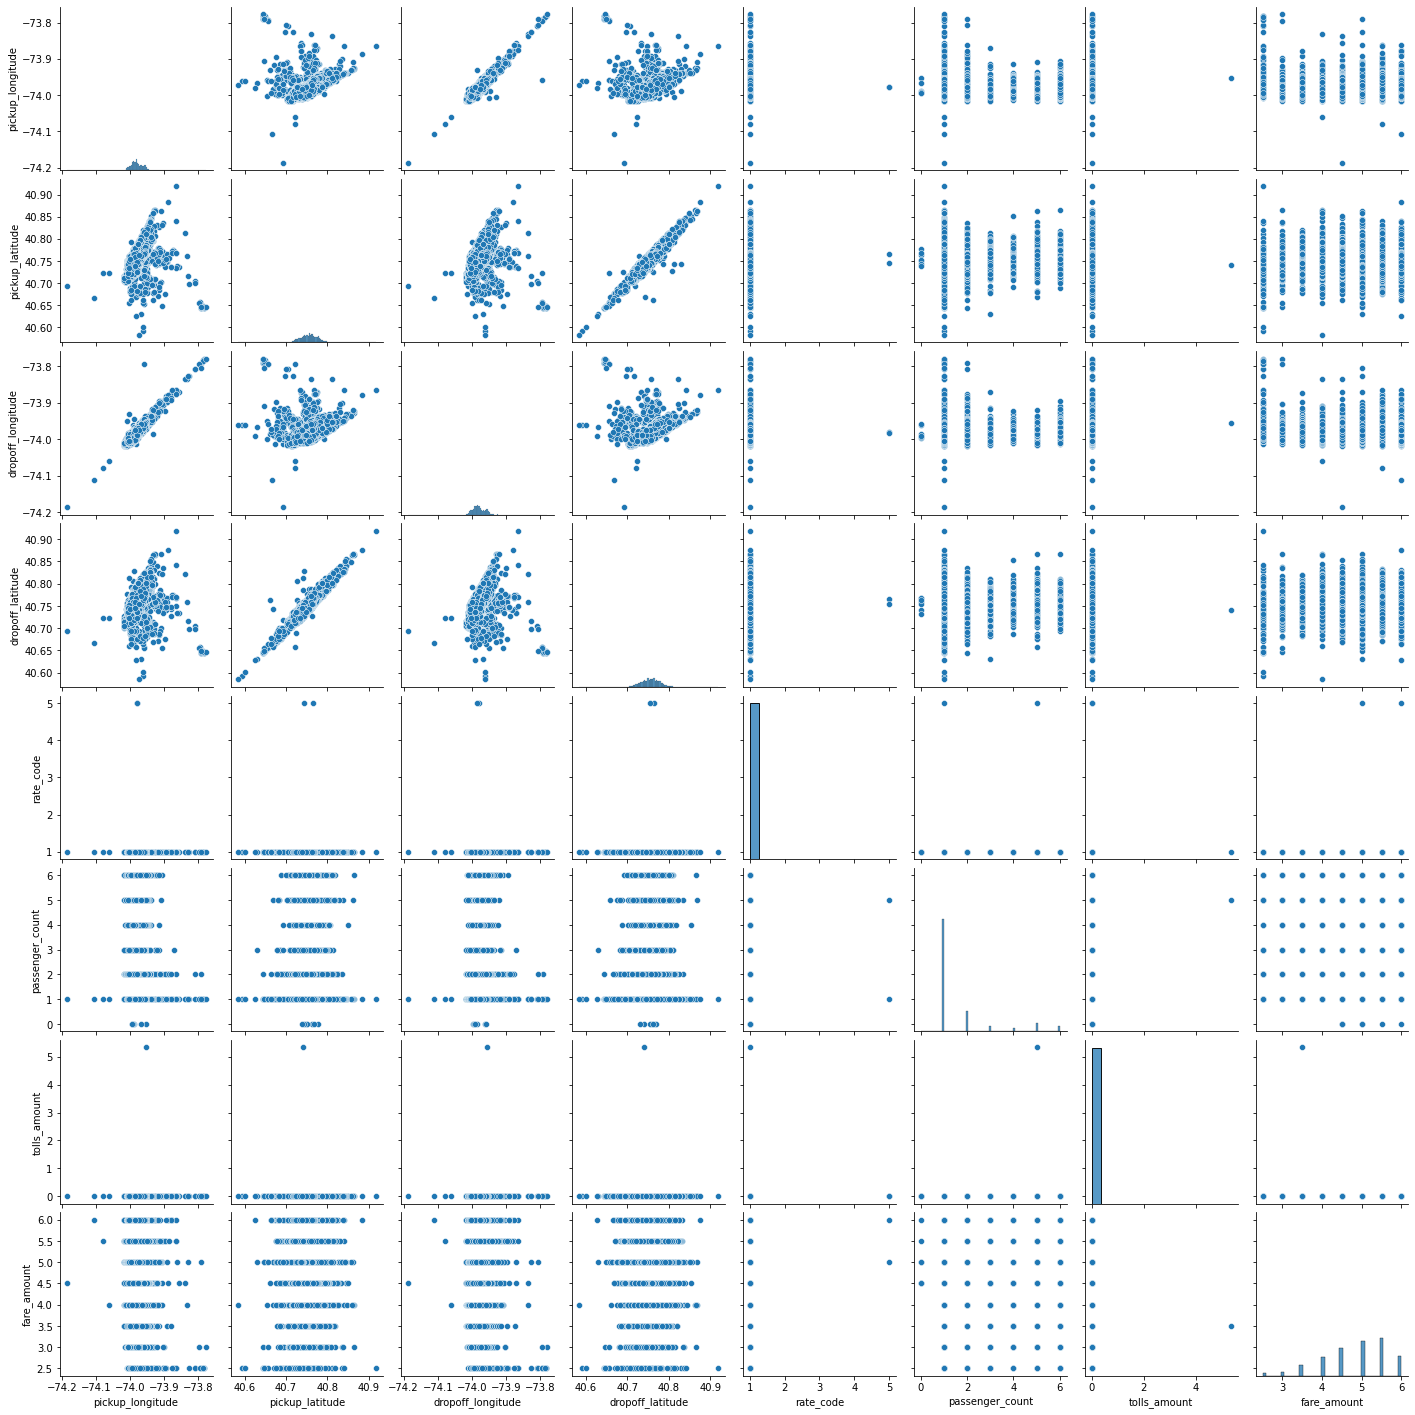

In [56]:
sns.pairplot(data)

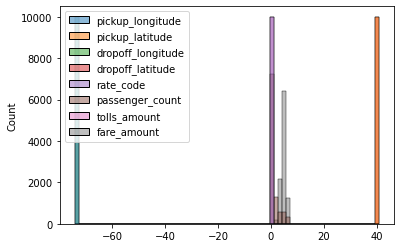

In [57]:
sns.histplot(data)

**Nhận xét về dữ liệu**


```
#TODO 3:
```
- Các trường numerical: ...

- Các trường categorical: ...


## Clean / Extract data

**Extract feature** day, hour từ pickup_datetime

In [125]:
# Đưa trường datetime về đúng định dạng
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [126]:
# Extract dayofweek, hourofday
data['day'] = data['pickup_datetime'].dt.dayofweek
data['hour'] = data['pickup_datetime'].dt.hour

In [127]:
data = data.drop(['pickup_datetime','dropoff_datetime'],axis=1)

fare_amount được cộng dồn từ phí taxi + phí đường bộ

In [128]:
data['fare_amount'] = data['fare_amount'] + data['tolls_amount']
data = data.drop('tolls_amount',axis=1)

Xóa **Outlier** với passenger_count = 0 

In [129]:
data = data[data['passenger_count'] !=0].reset_index(drop=True)

In [131]:
# backup raw data
data_raw = data

Check lại dữ liệu

In [132]:
data.head(5)

,vendor_id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,rate_code,passenger_count,fare_amount,day,hour
0,VTS,-73.989525,40.735950,-73.988747,40.736984,1,6,2.5,1,20
1,VTS,-73.987953,40.743717,-73.945580,40.829327,1,1,2.5,4,0
2,CMT,-73.977577,40.757839,-73.978226,40.758121,1,1,2.5,3,1
3,CMT,-73.992142,40.739388,-73.992096,40.739491,1,1,2.5,4,18
4,VTS,-74.004471,40.721657,-74.004333,40.721790,1,5,2.5,3,17


## Baseline model

👉 Trong thực tế, luôn nên xây dựng baseline model. Nó làm cơ sở để so sánh những bước xử lý dữ liệu về sau hiệu quả như thế nào

In [133]:
num_columns = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','rate_code','passenger_count','day','hour']
X = data[num_columns]
y = data['fare_amount']

In [134]:
# Sử dụng model LinearRegression đơn giản
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# TODO 4: Hoàn thành việc phân chia dữ liệu train/ test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=69)

In [135]:
print('train row count: {}'.format(X_train.shape[0]))
print(y_train.count())
print('test row count: {}'.format(X_test.shape[0]))
print(y_test.count())

train row count: 7994
7994
test row count: 1999
1999


In [136]:
# model
model = LinearRegression()
# training model
model.fit(X_train, y_train)

LinearRegression()

**Đánh giá mô hình baseline**

Nhắc lại về các loss metric đánh giá mô hình

MAE

MSE

RMSE

In [137]:
from sklearn.metrics import mean_squared_error

y_predict = model.predict(X_test)
# Kiểm tra loss của model
mean_squared_error(y_test, y_predict) 

0.6969467450394811

## Feature Engineering

In [138]:
data

,vendor_id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,rate_code,passenger_count,fare_amount,day,hour
0,VTS,-73.989525,40.735950,-73.988747,40.736984,1,6,2.5,1,20
1,VTS,-73.987953,40.743717,-73.945580,40.829327,1,1,2.5,4,0
2,CMT,-73.977577,40.757839,-73.978226,40.758121,1,1,2.5,3,1
3,CMT,-73.992142,40.739388,-73.992096,40.739491,1,1,2.5,4,18
4,VTS,-74.004471,40.721657,-74.004333,40.721790,1,5,2.5,3,17
...,...,...,...,...,...,...,...,...,...,...
9988,VTS,-73.978203,40.748501,-73.989586,40.735413,1,2,6.0,4,8
9989,CMT,-74.002960,40.733433,-74.003677,40.722553,1,1,6.0,0,18
9990,VTS,-73.977112,40.787426,-73.967957,40.800926,1,1,6.0,5,18
9991,CMT,-73.973511,40.763817,-73.974014,40.755287,1,1,6.0,4,7


**One-hot encode**

In [139]:
# Sử dụng OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(sparse=False)

onehot_encoded_vendor= onehot.fit_transform(data[["vendor_id"]])

In [140]:
data = data.drop('vendor_id',axis=1)
df_vendor = pd.DataFrame(onehot_encoded_vendor,columns = onehot.get_feature_names_out(['vendor_id']))
# concat
data = pd.concat([data,df_vendor],axis = 1)
data

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,rate_code,passenger_count,fare_amount,day,hour,vendor_id_CMT,vendor_id_VTS
0,-73.989525,40.735950,-73.988747,40.736984,1,6,2.5,1,20,0.0,1.0
1,-73.987953,40.743717,-73.945580,40.829327,1,1,2.5,4,0,0.0,1.0
2,-73.977577,40.757839,-73.978226,40.758121,1,1,2.5,3,1,1.0,0.0
3,-73.992142,40.739388,-73.992096,40.739491,1,1,2.5,4,18,1.0,0.0
4,-74.004471,40.721657,-74.004333,40.721790,1,5,2.5,3,17,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9988,-73.978203,40.748501,-73.989586,40.735413,1,2,6.0,4,8,0.0,1.0
9989,-74.002960,40.733433,-74.003677,40.722553,1,1,6.0,0,18,1.0,0.0
9990,-73.977112,40.787426,-73.967957,40.800926,1,1,6.0,5,18,0.0,1.0
9991,-73.973511,40.763817,-73.974014,40.755287,1,1,6.0,4,7,1.0,0.0


**Tạo mới feature**

Tính khoảng cách euclide từ pickup_longitude	/ pickup_latitude	dropoff_longitude /	dropoff_latitude


..............


In [141]:
def minkowski_distance(x1, x2, y1, y2, p):
    return ((abs(x2 - x1) ** p) + (abs(y2 - y1)) ** p) ** (1 / p)

In [142]:
data['distance'] = minkowski_distance(data.pickup_longitude, data.dropoff_longitude, 
                                           data.pickup_latitude, data.dropoff_latitude, 1)


In [143]:
data.head(5)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,rate_code,passenger_count,fare_amount,day,hour,vendor_id_CMT,vendor_id_VTS,distance
0,-73.989525,40.735950,-73.988747,40.736984,1,6,2.5,1,20,0.0,1.0,0.001812
1,-73.987953,40.743717,-73.945580,40.829327,1,1,2.5,4,0,0.0,1.0,0.127983
2,-73.977577,40.757839,-73.978226,40.758121,1,1,2.5,3,1,1.0,0.0,0.000931
3,-73.992142,40.739388,-73.992096,40.739491,1,1,2.5,4,18,1.0,0.0,0.000149
4,-74.004471,40.721657,-74.004333,40.721790,1,5,2.5,3,17,0.0,1.0,0.000271


**Bucketized feature**

👉 kinh độ và vĩ độ bins

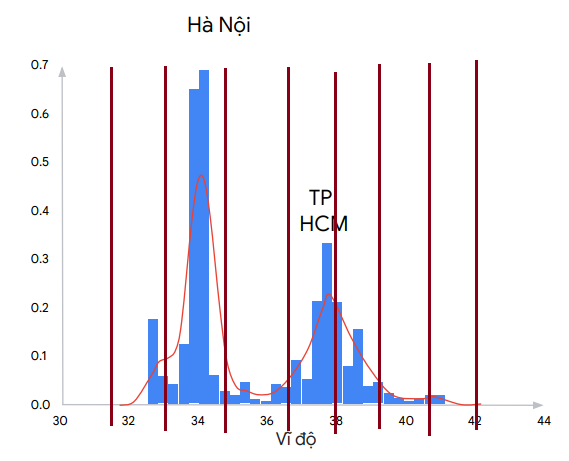

In [144]:
import numpy as np

step = 0.01
to_bin = lambda x: np.floor(x / step) * step
data["pickup_latitude"] = to_bin(data.pickup_latitude)
data["pickup_longitude"] = to_bin(data.pickup_longitude)
data["dropoff_latitude"] = to_bin(data.dropoff_latitude)
data["dropoff_longitude"] = to_bin(data.dropoff_longitude)

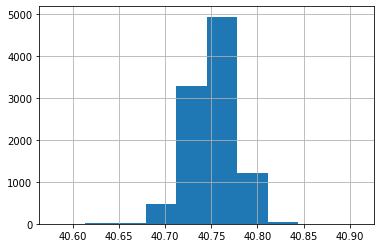

In [145]:
# check lại phân phối
data.pickup_latitude.hist()

**Feature cross**

day & hour: giờ và ngày trong tuần quan hệ ntn?

👉 nên tạo feature mới để thể hiện mối quan hệ của giờ trong tuần. Ví dụ giá taxi của trưa thứ 4 giữa tuần vs tối thứ 6 cuối tuần

In [146]:
#data['day_hour'] = data.apply(lambda x: "{}_{}".format(x['day'],x['hour']),axis =1)
data['day_hour'] = data.apply(lambda x: x['day']*x['hour'],axis =1)

In [148]:
data.head(5)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,rate_code,passenger_count,fare_amount,day,hour,vendor_id_CMT,vendor_id_VTS,distance,day_hour
0,-73.99,40.73,-73.99,40.73,1,6,2.5,1,20,0.0,1.0,0.001812,20.0
1,-73.99,40.74,-73.95,40.82,1,1,2.5,4,0,0.0,1.0,0.127983,0.0
2,-73.98,40.75,-73.98,40.75,1,1,2.5,3,1,1.0,0.0,0.000931,3.0
3,-74.00,40.73,-74.00,40.73,1,1,2.5,4,18,1.0,0.0,0.000149,72.0
4,-74.01,40.72,-74.01,40.72,1,5,2.5,3,17,0.0,1.0,0.000271,51.0


**Tạo mới model sau thực hiện Feature Engineering**

In [149]:
num_columns = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','rate_code','passenger_count','fare_amount','day','hour','vendor_id_CMT','vendor_id_VTS','distance','day_hour']
X = data[num_columns]
y = data['fare_amount']

In [154]:
# Sử dụng model LinearRegression đơn giản
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=69)

In [155]:
#TODO 5: Huấn luyện mô hình
# Training mô hình
model = LinearRegression()
# training model
model.fit(X_train, y_train)

LinearRegression()

In [156]:
#TODO 6: Đánh giá mô hình

y_predict = model.predict(X_test)

mean_squared_error(y_test, y_predict) 

5.516383159486222e-29

## So sánh mô hình

Ta so sánh mô hình baseline và mô hình sau feature engineering

| Model          | MSE loss | Description                                  |
|----------------|-----------|----------------------------------------------|
| baseline_model | 0.69      | Baseline model - no feature engineering    |
| model_1        | 0.5e-30      | Model with feature engineering |

👉 Mô hình tốt hơn rất nhiều sau khi được Feature Engineering với hiểu biết về dữ liệu sau quá trình EDA

# Tổng kết

> Qua bài lab học viên nắm được các kiến thức
- Clean Data
- EDA
- Feature Engineering
- Tạo model regression đơn giản